# <center><a href='https://colab.research.google.com/github/cpge-itc/itc1/blob/main/files/5_graph/tp/tp4/tp_dfs.ipynb'>TP : Parcours en profondeur <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

Dans ce TP, on pourra utiliser la fonction suivante pour afficher un graphe représenté par liste d'adjacence :

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def draw(G):
    G_ = nx.Graph()
    G_.add_edges_from([(i, j) for i in range(len(G)) for j in G[i]])
    plt.clf()
    nx.draw(G_, node_size=700, font_size=20, node_color= "white", edgecolors="black", with_labels=True)
    plt.show()

**Exercice** : Définir une liste d'adjacence représentant le graphe `G_ex` ci-dessous et vérifier avec `draw`.  
<center><img src=https://github.com/fortierq/itc1/raw/4be1ee8d9679ffae521c506ad54acb9e6099c614/files/5_graph/tp/tp2/g.png width=200></center>

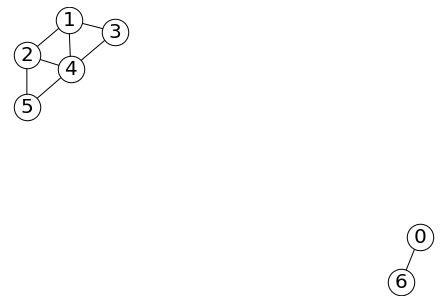

In [10]:
G = [
    [6],
    [3, 4, 2],
    [1, 4, 5],
    [1, 4],
    [3, 1, 2, 5],
    [2, 4],
    [0]
]
draw(G)

**Exercice** : Écrire une fonction `dfs(G, s)` renvoyant la liste des sommets de `G` suivant un parcours en profondeur depuis le sommet `s`. Vérifier sur le graphe `G_ex` précédent.  
On essaierai de compléter le code ci-dessous. Ne regarder le cours que si cela est vraiment nécessaire.

In [3]:
def dfs(G, s):
    # définir une liste de booléens pour savoir si un sommet a été visité
    def aux(u): # fonction récursive
        # si u n'a pas été visité :
            # afficher u
            # marquer u comme visité
            # pour chaque voisin v de u
                # appeler aux(v)
    aux(s)

IndentationError: expected an indented block (<ipython-input-3-86ba1a145e36>, line 9)

In [4]:
def dfs(G, s):
    visited = [False]*len(G)
    L = []
    def aux(u):
        if not visited[u]:
            L.append(u)
            visited[u] = True
            for v in G[u]:
                aux(v)
    aux(s)
    return L # on pourra aussi renvoyer tous les sommets à True dans visited

dfs(G, 1)

[1, 3, 4, 2, 5]

**Exercice** : En utilisant un parcours en profondeur, écrire une fonction `connexe(G)` qui renvoie `True` si le graphe `G` est connexe, `False` sinon.  
Vérifier sur `G_ex` (non connexe) et sur un graphe connexe de votre choix.

In [5]:
def connexe(G):
    return len(dfs(G, 0)) == len(G) # teste si tous les sommets ont été visités

connexe(G)

False

**Exercice** : Écrire une fonction `composante_connexe(G, v)` qui renvoie la composante connexe du sommet `v` dans le graphe `G`, c'est-à-dire la liste des sommets (dans n'importe quel ordre) de `G` qui sont accessibles depuis `v`.  
Par exemple, `composante_connexe(G_ex, 0)` peut renvoyer `[0, 6]` et `composante_connexe(G_ex, 1)` peut renvoyer `[3, 1, 4, 2, 5]`.

In [6]:
def composante_connexe(G, v):
    return dfs(G, v) # tout simplement...

**Exercice** : Écrire une fonction `composantes_connexes(G)` qui renvoie la liste des composantes connexes (dans n'importe quel ordre) du graphe `G`.  
Par exemple, `composantes_connexes(G_ex)` peut renvoyer `[[0, 6], [3, 1, 4, 2, 5]]`.

In [7]:
# pour éviter d'avoir plusieurs fois la même composante connexe, 
# il est préférable d'utiliser la même liste visited dans tous les appels récursifs
def dfs2(G, s, visited):
    L = []
    def aux(u):
        if not visited[u]:
            L.append(u)
            visited[u] = True
            for v in G[u]:
                aux(v)
    aux(s)
    return L

def composantes_connexes(G):
    visited = [False]*len(G)
    composantes = []
    for v in range(len(G)):
        L = dfs2(G, v, visited)
        if len(L) > 0:
            composantes.append(L)
    return composantes

composantes_connexes(G)

[[0, 6], [1, 3, 4, 2, 5]]

**Exercice** : Écrire une fonction `chemin(G, u, v)` renvoyant `True` s'il existe un chemin de `u` à `v` dans le graphe `G`, `False` sinon.  
Par exemple, `chemin(G_ex, 0, 5)` doit renvoyer `False` et `chemin(G_ex, 3, 4)` doit renvoyer `False`.

In [8]:
# on peut regarder si les 2 sommets appartiennent à la même composante connexe
def chemin(G, u, v):
    return v in dfs(G, u)

print(chemin(G, 0, 1))
print(chemin(G, 3, 1))

# on peut aussi recoder le "in" :
def chemin(G, u, v):
    L = dfs(G, u)
    for w in L:
        if w == v:
            return True
    return False

False
True


**Exercice** : Réécrire une fonction `chemin(G, u, v)` de façon à renvoyant la liste des sommets d'un chemin de `u` à `v` dans le graphe `G`. S'il n'y a pas de chemin, renvoyer une liste vide.

In [9]:
# il faut réécrire dfs :
def chemin(G, u, v):
    visited = [False]*len(G)
    L = [u]
    def aux(u): # renvoie True ssi un chemin vers v a été trouvé
        if u == v:
            return True
        if not visited[u]:
            visited[u] = True
            for w in G[u]:
                if aux(w): # il y a un chemin vers v passant par w
                    L.append(w)
                    return True
        return False
    aux(u)
    return L

chemin(G, 2, 3)

[2, 3, 1]